In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [2]:
data_path = 'Crop_recommendation.csv'
df = pd.read_csv(data_path)

In [3]:
df.isnull().sum()

Nitrogen (mg)      0
Phosphorus (mg)    0
Potassium (mg)     0
Temperature (C)    0
Humidity (%)       0
PH (3-11)          0
Rainfall (mm)      0
label              0
dtype: int64

In [4]:
df.head()

,Nitrogen (mg),Phosphorus (mg),Potassium (mg),Temperature (C),Humidity (%),PH (3-11),Rainfall (mm),label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,Nitrogen (mg),Phosphorus (mg),Potassium (mg),Temperature (C),Humidity (%),PH (3-11),Rainfall (mm),label
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts
8799,25,55,22,33.191011,52.475590,6.727969,32.812965,groundnuts


In [6]:
print(f"Rows, Cols = {df.shape}")
print(f"Rows * Cols = {df.size}")
# features of dataset
df.columns

Rows, Cols = (8800, 8)
Rows * Cols = 70400


Index(['Nitrogen (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Temperature (C)',
       'Humidity (%)', 'PH (3-11)', 'Rainfall (mm)', 'label'],
      dtype='object')

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'groundnuts'],
      dtype=object)

<Axes: >

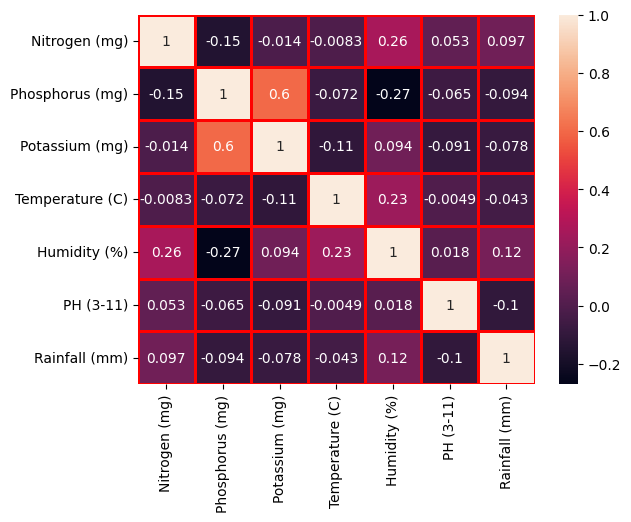

In [8]:
# Making a heatmap of the dataset correlation : including only numerical data
linewidth = 2
linecolor = "red"

sns.heatmap(data=df.select_dtypes(include='number').corr(),
            annot=True, 
            linewidth = linewidth, 
            linecolor = linecolor)

In [9]:
df['label'].value_counts()

label
rice           400
maize          400
coffee         400
jute           400
cotton         400
coconut        400
papaya         400
orange         400
muskmelon      400
watermelon     400
grapes         400
mango          400
banana         400
pomegranate    400
lentil         400
blackgram      400
mungbean       400
mothbeans      400
pigeonpeas     400
kidneybeans    400
chickpea       400
groundnuts     400
Name: count, dtype: int64

Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
features = df[['Nitrogen (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Temperature (C)', 'Humidity (%)', 'PH (3-11)', 'Rainfall (mm)']]
target = df['label']

xtrain, xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size = 0.2,
                                                random_state = None)

In [11]:
best_model = {}

In [12]:
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [13]:
# cross validation accuracy
from sklearn.model_selection import cross_val_score

def cross_val_accuracy(model):
    # This function calculates the mean cross validation accuracy
    score = cross_val_score(model, features, target,cv=5)
    #get the mean of each fold 
    return score.mean() * 100

In [14]:
# saving model

import pickle

def save_model(model, modelname):
    #This function expects a model and a modelname(with .pkl extension)
    # Setting model path
    pkl_filename = 'D:/Projects/Crop recommendation/'+modelname
    # Open the file to save as pkl file
    model_pkl = open(pkl_filename, 'wb')
    #dump model
    pickle.dump(model, model_pkl)
    # Close the pickle instances
    model_pkl.close()

Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=None)

# Fitting the training set to create a model
RandomForest.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = RandomForest.predict(xtest)

accuracy = metrics.accuracy_score(ypred, ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Random Forest"] = accuracy*100
print(best_model)

Accuracy: 0.9210227272727273

{'Random Forest': 92.10227272727273, 'SVM': 94.0340909090909, 'Naive Bayes': 94.20454545454545, 'Neural Network': 94.26136612892151, 'Decision Tree': 89.60227272727272}


In [16]:
print(f"Cross Validation Accuracy {cross_val_accuracy(RandomForest)}")

Cross Validation Accuracy 95.17045454545455


In [17]:
save_model(RandomForest,'RandomForest.pkl')

Support Vector Machines (SVM)

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
ypred = SVM.predict(x_test_norm)

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["SVM"] = accuracy*100
print(best_model)

Accuracy: 0.9403409090909091

{'Random Forest': 92.04545454545455, 'SVM': 94.0340909090909}


In [19]:
print(f"Cross Validation Accuracy {cross_val_accuracy(SVM)}")

Cross Validation Accuracy 94.01136363636363


In [20]:
save_model(SVM,'SVM.pkl')

Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

# Fitting the training set to create a model
NaiveBayes.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = NaiveBayes.predict(xtest)

accuracyn = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracyn}",end='\n\n')

# Adding the model to our dictionary
best_model["Naive Bayes"] = accuracyn*100
print(best_model)

Accuracy: 0.9420454545454545

{'Random Forest': 92.04545454545455, 'SVM': 94.0340909090909, 'Naive Bayes': 94.20454545454545}


In [22]:
print(f"Cross Validation Accuracy {cross_val_accuracy(NaiveBayes)}")

Cross Validation Accuracy 94.73863636363635


In [23]:
save_model(NaiveBayes,'NaiveBayes.pkl')

Neural Network

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the target labels and transform them
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

In [46]:
# Build the model
model = Sequential()
# Shape (None,7)
model.add(Dense(64, activation='relu', input_shape=(7,)))
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callback
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
            self.model.stop_training = True

# Create an instance of the callback
callback = AccuracyCallback()


In [47]:
# Train the model with the encoded target labels and the callback
model.fit(xtrain_scaled, ytrain_encoded, epochs=20, batch_size=32, validation_data=(xtest_scaled, ytest_encoded), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(xtest_scaled, ytest_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Epoch 1/20
220/220 [==============================] - 2s 4ms/step - loss: 0.8529 - accuracy: 0.7548 - val_loss: 0.2340 - val_accuracy: 0.8972
Epoch 2/20
220/220 [==============================] - 1s 3ms/step - loss: 0.1982 - accuracy: 0.9122 - val_loss: 0.1568 - val_accuracy: 0.9216
Epoch 3/20
220/220 [==============================] - 1s 3ms/step - loss: 0.1568 - accuracy: 0.9223 - val_loss: 0.1347 - val_accuracy: 0.9261
Epoch 4/20
220/220 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9300 - val_loss: 0.1373 - val_accuracy: 0.9318
Epoch 5/20
220/220 [==============================] - 1s 3ms/step - loss: 0.1308 - accuracy: 0.9280 - val_loss: 0.1072 - val_accuracy: 0.9438
Epoch 6/20
220/220 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9310 - val_loss: 0.0989 - val_accuracy: 0.9438
Epoch 7/20
220/220 [==============================] - 1s 3ms/step - loss: 0.1138 - accuracy: 0.9352 - val_loss: 0.1115 - val_accuracy: 0.9347
Epoch 

In [48]:
best_model['Neural Network'] = test_acc*100
print(best_model)

{'Random Forest': 92.10227272727273, 'SVM': 94.0340909090909, 'Naive Bayes': 94.20454545454545, 'Neural Network': 94.14772987365723, 'Decision Tree': 89.60227272727272}


In [29]:
# Save the model
model.save("tensorflow_model.keras")

Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = "entropy",
                                     random_state = None,
                                     max_depth = 5)
# Fitting the training set to create a model
DecisionTree.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = DecisionTree.predict(xtest)
# Checking whether the predicted y for test(x) matches actual test(y)
accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Decision Tree"] = accuracy*100
print(best_model)

Accuracy: 0.8960227272727272

{'Random Forest': 92.04545454545455, 'SVM': 94.0340909090909, 'Naive Bayes': 94.20454545454545, 'Neural Network': 94.26136612892151, 'Decision Tree': 89.60227272727272}


In [31]:
print(f"Cross Validation Accuracy {cross_val_accuracy(DecisionTree)}")

Cross Validation Accuracy 87.26136363636364


In [33]:
save_model(DecisionTree,'DecisionTree.pkl')

comparing all models

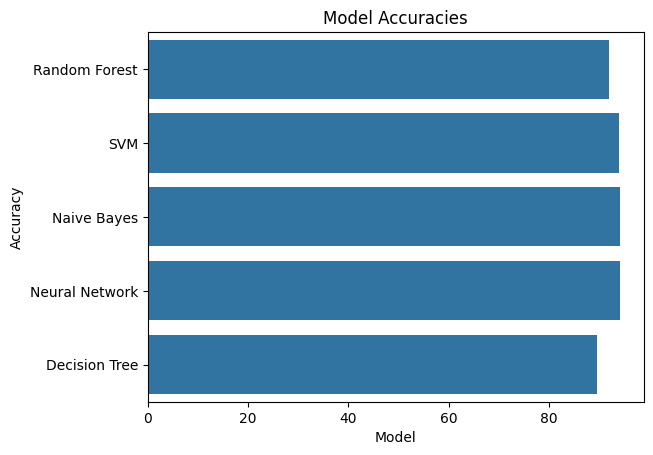

In [49]:
# Extract model names and accuracies from the best_model dictionary
accuracies = list(best_model.values())
model_names = list(best_model.keys())

# Create a bar plot using seaborn
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

In [50]:
# sorting based on accuracy
sorted_items = sorted(best_model.items(), key=lambda x: x[1], reverse=True)

# Print the keys and values in descending order
for key, value in sorted_items:
    print(f"{key}: {value}")

Naive Bayes: 94.20454545454545
Neural Network: 94.14772987365723
SVM: 94.0340909090909
Random Forest: 92.10227272727273
Decision Tree: 89.60227272727272


In [51]:
# selecting the model with high accuracy
max_key = max(best_model, key=best_model.get)
max_value = best_model[max_key]

print(f"Key: {max_key}, Value: {max_value}")

Key: Naive Bayes, Value: 94.20454545454545


In [33]:
# Randomly select one row from the DataFrame
random_row = df.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['Nitrogen (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Temperature (C)', 'Humidity (%)', 'PH (3-11)', 'Rainfall (mm)']].values

      Nitrogen (mg)  Phosphorus (mg)  Potassium (mg)  Temperature (C)  \
5773            111               28              47        26.982128   

      Humidity (%)  PH (3-11)  Rainfall (mm)       label  
5773     86.700683   6.770434      42.912922  watermelon  


In [34]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['Nitrogen (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Temperature (C)', 'Humidity (%)', 'PH (3-11)', 'Rainfall (mm)'])
model = NaiveBayes
prediction = model.predict(data_with_feature_names)
print(prediction)

['watermelon']


In [35]:
# Randomly select one row from the DataFrame
random_row = df.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['Nitrogen (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Temperature (C)', 'Humidity (%)', 'PH (3-11)', 'Rainfall (mm)']].values

      Nitrogen (mg)  Phosphorus (mg)  Potassium (mg)  Temperature (C)  \
3512            103                9              48        27.330121   

      Humidity (%)  PH (3-11)  Rainfall (mm)       label  
3512     87.484775   7.145108      57.573432  watermelon  


In [36]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['Nitrogen (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Temperature (C)', 'Humidity (%)', 'PH (3-11)', 'Rainfall (mm)'])
prediction = NaiveBayes.predict(data_with_feature_names)
print(prediction)

['watermelon']


In [105]:
# model = NaiveBayes

In [52]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import joblib

win = tk.Tk()
win.title('Crop Recommendation')
heading_label = ttk.Label(win, text="Crop Recommendation System", font=('Helvetica', 14, 'bold'))
heading_label.grid(row=0, column=0, columnspan=3)

# Labels and entry boxes for user input
labels = ['Nitrogen (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Temperature (C)', 'Humidity (%)', 'PH (3-11)', 'Rainfall (mm)']

input_vars = []

for i, label in enumerate(labels):
    ttk.Label(win, text=label).grid(row=i+1, column=0, sticky=tk.W)
    var = tk.StringVar()
    entry = ttk.Entry(win, width=25, textvariable=var)
    entry.grid(row=i+1, column=1)
    input_vars.append(var)


In [ ]:
def recommend_crop():
    # Retrieve user inputs
    user_input = [var.get() for var in input_vars]
    user_input = pd.DataFrame([user_input], columns=labels)

    crop_model = model
    predicted_crop = crop_model.predict(user_input)[0]
    accuracy = accuracyn

    # Display recommendation
    result_var.set(f"Predicted Crop: {predicted_crop}, Accuracy: {accuracy:.2f}")

    # Highlight the output/result
    result_entry.configure(highlightcolor='green', highlightthickness=2)

# Button for prediction
predict_button = ttk.Button(win, text="Predict", command=recommend_crop, style='Green.TButton')
predict_button.grid(row=len(labels)+1, column=0)

# Entry box for displaying prediction
result_var = tk.StringVar()
result_entry = ttk.Entry(win, width=50, textvariable=result_var, state='readonly', font=('Helvetica', 12, 'bold'))
result_entry.grid(row=len(labels)+1, column=1, columnspan=2, padx=5)

# Add style for green button
style = ttk.Style()
style.configure('Green.TButton', foreground='black', background='green')

win.mainloop()